In [1]:
import matplotlib.pyplot as plt
import numpy as np

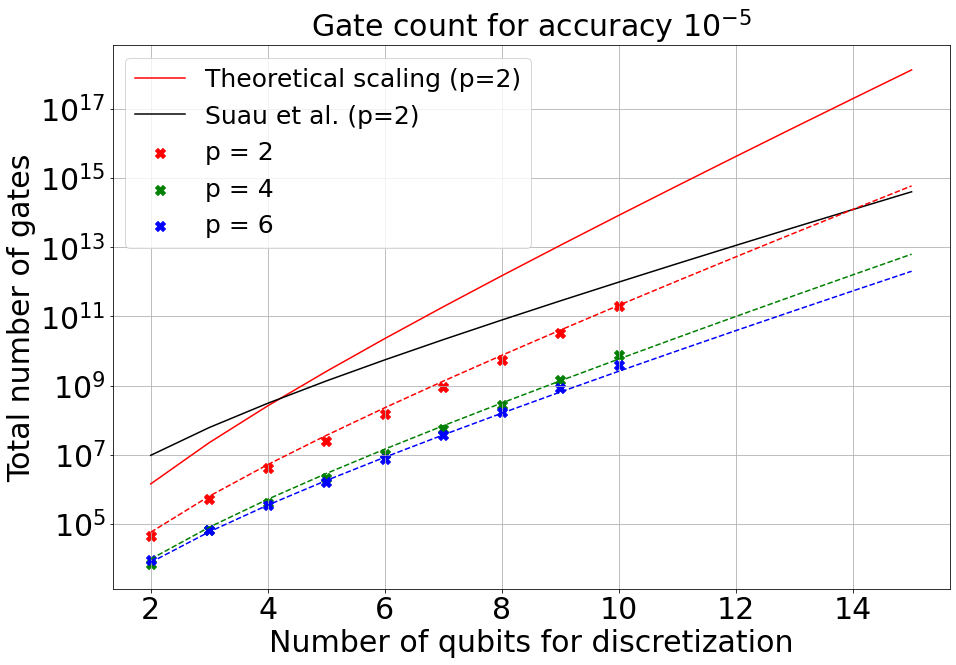

In [2]:
nq_list = list(range(2,11))
nq_list_ = range(2,16)


set_error = 10**(-5)

# data generated using make_data_gate_count.ipynb

one_step_2 = [86, 266, 630, 1282, 2658, 5690, 12014, 25994, 55626]
trot_step_2 = [520, 1942, 6344, 19243, 56285, 161744, 460887, 1308146, 3706289]


one_step_4 = [382,1242,2926,6114,12730,27370,57958,125802,269858]
trot_step_4 = [18,52,138,346,843,2029,4852,11571,27558]

one_step_6 = [1862,6122,14406,30274,63090,135770,287678,624842,1341018]
trot_step_6 = [5,11,24,53,118,266,598,1345,3021]


plt.figure(figsize = (15,10))

p=2
pow_n_theor = 2 + 1/p
pow_N_theor = 2 + 1/p
gamma_theor = 5**(p)*(1/set_error)**(1/p)

plt.plot(nq_list_, [gamma_theor*(n**pow_n_theor)*((2**n)**pow_N_theor) for n in nq_list_], c='r', linestyle='solid',label='Theoretical scaling (p=2)')

pow_n_suau = 2
pow_N_suau = 3/2
gamma_suau = 300000

plt.plot(nq_list_, [gamma_suau*(n**pow_n_suau)*((2**n)**pow_N_suau) for n in nq_list_], c='black', linestyle='solid',label='Suau et al. (p=2)')


plt.scatter(nq_list, [r*o for r,o in zip(trot_step_2,one_step_2)], c='r', marker='X', label = 'p = 2', s=100)
plt.scatter(nq_list, [r*o for r,o in zip(trot_step_4,one_step_4)], c='g', marker='X', label = 'p = 4', s=100)
plt.scatter(nq_list, [r*o for r,o in zip(trot_step_6,one_step_6)], c='b', marker='X', label = 'p = 6', s=100)

for p,c in zip([2,4,6],['r','g','b']):
    gamma = 2*5**(p/2 - 1)*(1/set_error)**(1/p)
    if p==6: gamma = 5**(p/2 - 1)*(1/set_error)**(1/p)
    pow_n = 2 + 1/p
    pow_N = 1.5 + 1/p
    plt.plot(nq_list_, [gamma*(n**pow_n)*((2**n)**pow_N) for n in nq_list_], c=c, linestyle='dashed')
    
    
plt.yscale('log')
# plt.xscale('log')
plt.grid(alpha = 1)
plt.legend(fontsize = 25)
plt.title('Gate count for accuracy $10^{-5}$', fontsize = 30)
plt.xlabel('Number of qubits for discretization', fontsize = 30 )
plt.ylabel('Total number of gates', fontsize = 30 )

plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)

plt.savefig("total_gate_count_eps_10-5_with_suau_fixed_dx.pdf", format="pdf", bbox_inches="tight")